# Classification based on Audio 

1.   All the WAV files are Converted into Spectogram Images
2.   And then we extract Imformation from Spectogram Images into numpy arrays using mel_spectogram
3. And Then we Split dataset into train and test using train_test_split
4. And all the classes(categorical) are encoding using One_Hot_encoding



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sat Nov  7 06:11:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
print(os.listdir("/content/drive/My Drive/ultrasound"))

['UrbanSound8K.csv', 'fold1', 'fold10', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [6]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [8]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [24]:
df=pd.read_csv('/content/drive/My Drive/ultrasound/UrbanSound8K.csv')
df

slice_file_name    fsID       start  ...  fold  classID             class
0       100032-3-0-0.wav  100032    0.000000  ...     5        3          dog_bark
1     100263-2-0-117.wav  100263   58.500000  ...     5        2  children_playing
2     100263-2-0-121.wav  100263   60.500000  ...     5        2  children_playing
3     100263-2-0-126.wav  100263   63.000000  ...     5        2  children_playing
4     100263-2-0-137.wav  100263   68.500000  ...     5        2  children_playing
...                  ...     ...         ...  ...   ...      ...               ...
8727     99812-1-2-0.wav   99812  159.522205  ...     7        1          car_horn
8728     99812-1-3-0.wav   99812  181.142431  ...     7        1          car_horn
8729     99812-1-4-0.wav   99812  242.691902  ...     7        1          car_horn
8730     99812-1-5-0.wav   99812  253.209850  ...     7        1          car_horn
8731     99812-1-6-0.wav   99812  332.289233  ...     7        1          car_horn

[8732 rows x 8 columns]

In [10]:
import IPython.display as ipd
ipd.Audio("/content/drive/My Drive/ultrasound/fold1/102842-3-1-6.wav")

In [11]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold2/102871-8-0-1.wav")

In [12]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold3/103199-4-1-0.wav")

In [13]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold4/107653-9-0-7.wav")

In [14]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold5/100263-2-0-137.wav")

In [15]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold6/104327-2-0-15.wav")

In [16]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold7/101848-9-0-8.wav")

In [17]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold8/107090-1-0-0.wav")

In [18]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold9/101729-0-0-16.wav")

In [19]:
ipd.Audio("/content/drive/My Drive/ultrasound/fold10/100795-3-1-1.wav")

In [20]:
data1,s_rate = librosa.load('/content/drive/My Drive/ultrasound/fold1/103074-7-0-2.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

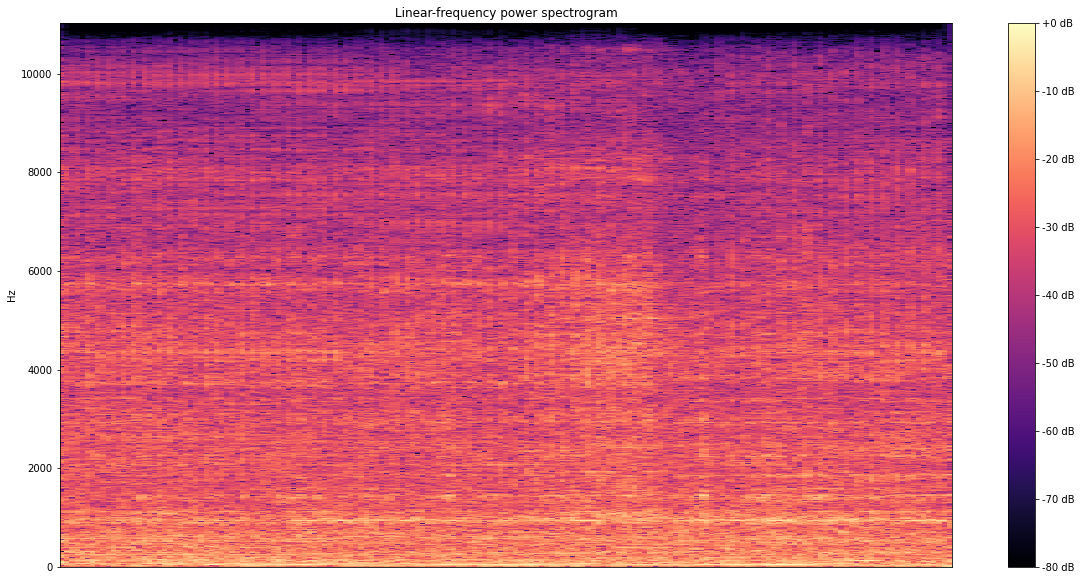

In [21]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

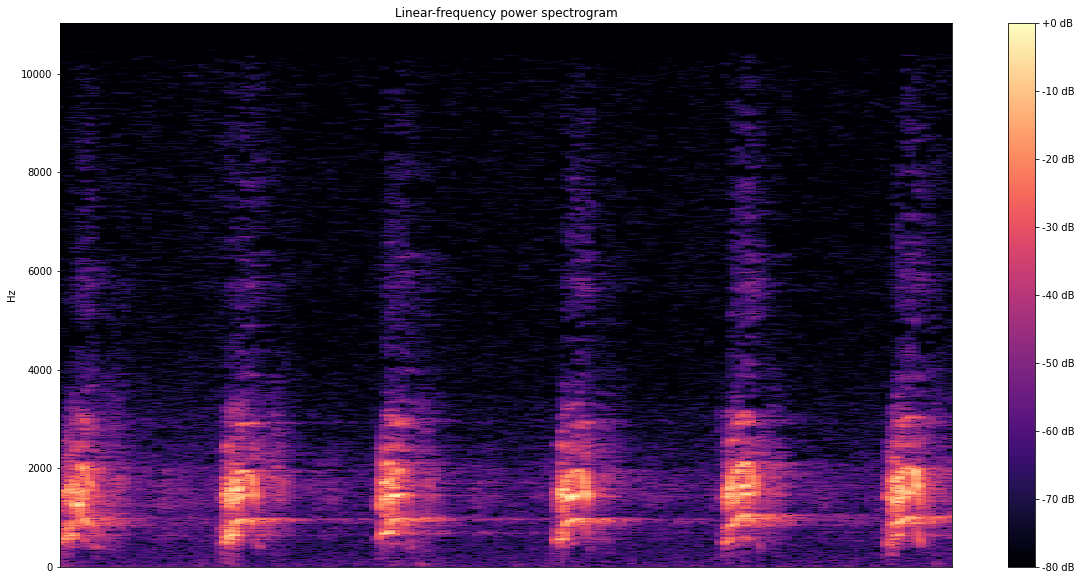

In [22]:
data2,s_rate = librosa.load('/content/drive/My Drive/ultrasound/fold10/100795-3-1-1.wav')
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data2)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [25]:
df["slice_file_name"]

0         100032-3-0-0.wav
1       100263-2-0-117.wav
2       100263-2-0-121.wav
3       100263-2-0-126.wav
4       100263-2-0-137.wav
               ...        
8727       99812-1-2-0.wav
8728       99812-1-3-0.wav
8729       99812-1-4-0.wav
8730       99812-1-5-0.wav
8731       99812-1-6-0.wav
Name: slice_file_name, Length: 8732, dtype: object

In [26]:
df["fold"]

0       5
1       5
2       5
3       5
4       5
       ..
8727    7
8728    7
8729    7
8730    7
8731    7
Name: fold, Length: 8732, dtype: int64

In [27]:
df["class"]

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [28]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

In [29]:
arr

array(['100032-3-0-0.wav', '100263-2-0-117.wav', '100263-2-0-121.wav',
       ..., '99812-1-4-0.wav', '99812-1-5-0.wav', '99812-1-6-0.wav'],
      dtype=object)

In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [35]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = '/content/drive/My Drive/ultrasound/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [36]:
temp = parser(df)

KeyboardInterrupt: ignored